In [5]:
import torch
from AutoDecoder import AutoDecoder
from utils import create_dataloaders, plot_tsne
from evaluate import evaluate_model
import matplotlib.pyplot as plt
import os

In [6]:
torch.random.manual_seed(42)

In [5]:
# Parameters
latent_dim = 128  # Increase latent dimension to 128
batch_size = 64
epochs = 20
learning_rate = 0.0005

In [6]:
# Load the dataset (train and test splits are handled in the function)
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path='dataset', batch_size=batch_size, shuffle=True, num_workers=2)

# Debugging: Check if the datasets are loaded properly
print(f"Training dataset size: {len(train_ds)}")
print(f"Test dataset size: {len(test_ds)}")
print(f"Number of batches in training DataLoader: {len(train_dl)}")
print(f"Number of batches in test DataLoader: {len(test_dl)}")

Training dataset size: 1000
Test dataset size: 1000
Number of batches in training DataLoader: 16
Number of batches in test DataLoader: 16


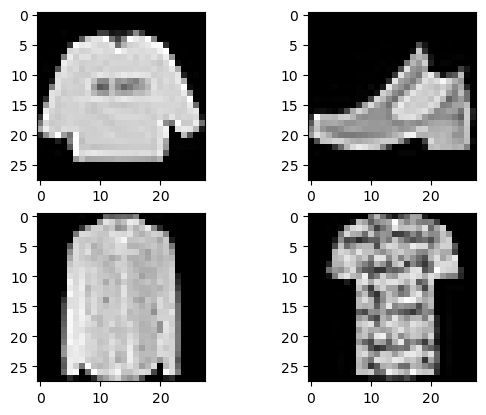

Image size: torch.Size([28, 28])


In [6]:
#explore the training dataset
plt.figure(1)
num_samples = 4
for i in range(num_samples):
    plt.subplot(221+i)
    plt.imshow(train_ds[i][1], cmap='gray')
plt.show()

#lets see the size of the images
print(f"Image size: {train_ds[0][1].shape}")

In [7]:
#lets have a look at the values of the pixels of the images
print(f"Min pixel value: {train_ds[0][1].min()}")
print(f"Max pixel value: {train_ds[0][1].max()}")

# TODO: consider if we need to normalize the images
# for i in range(len(train_ds)):
#     train_ds[i] = (train_ds[i][0], train_ds[i][1].float()/255)

Min pixel value: 0
Max pixel value: 255


In [8]:
from AutoDecoder import Trainer
trainer = Trainer()
trainer.train_and_evaluate()

Epoch 1/100
Epoch [1/100], Loss: 0.5627
Epoch 2/100
Epoch [2/100], Loss: 0.4485
Epoch 3/100
Epoch [3/100], Loss: 0.4183
Epoch 4/100
Epoch [4/100], Loss: 0.3949
Epoch 5/100
Epoch [5/100], Loss: 0.3646
Epoch 6/100
Epoch [6/100], Loss: 0.3154
Epoch 7/100
Epoch [7/100], Loss: 0.2878
Epoch 8/100
Epoch [8/100], Loss: 0.2830
Epoch 9/100
Epoch [9/100], Loss: 0.2313
Epoch 10/100
Epoch [10/100], Loss: 0.2062
Epoch 11/100
Epoch [11/100], Loss: 0.1973
Epoch 12/100
Epoch [12/100], Loss: 0.1914
Epoch 13/100
Epoch [13/100], Loss: 0.2016
Epoch 14/100
Epoch [14/100], Loss: 0.1910
Epoch 15/100
Epoch [15/100], Loss: 0.1697
Epoch 16/100
Epoch [16/100], Loss: 0.1675
Epoch 17/100
Epoch [17/100], Loss: 0.1704
Epoch 18/100
Epoch [18/100], Loss: 0.1582
Epoch 19/100
Epoch [19/100], Loss: 0.1418
Epoch 20/100
Epoch [20/100], Loss: 0.1342
Epoch 21/100
Epoch [21/100], Loss: 0.1313
Epoch 22/100
Epoch [22/100], Loss: 0.1350
Epoch 23/100
Epoch [23/100], Loss: 0.1325
Epoch 24/100
Epoch [24/100], Loss: 0.1242
Epoch 25/1

In [9]:
trainer.plot_tsne()

Generating t-SNE plot...


<Figure size 800x600 with 0 Axes>

In [10]:
trainer.test_samples()

Generating random samples...
Saving images...
Images saved to output_images/random_latents_images.png
Saving images...
Images saved to output_images/test_set_latents_images.png


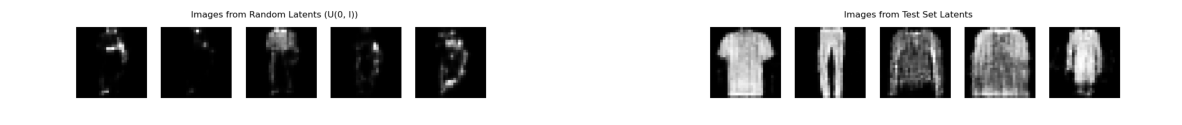

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image paths
image_paths = ['output_images/random_latents_images.png', 'output_images/test_set_latents_images.png']

# Set up a grid
fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))  # 1 row, len(image_paths) columns

for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Hide axes

plt.show()



In [18]:
from VariationalAutoDecoder import VariationalAutoDecoder
import numpy as np
from torchsummary import summary

In [19]:
learning_rate = 0.02
epochs = 100
latent_dim = 60
model = VariationalAutoDecoder(latent_dim=latent_dim,lr=learning_rate)
train_loss = model.train_model(num_epochs=epochs, beta=1)
print(f'Training loss: {train_loss:.4f}')
test_loss = model.test_vad(num_epochs=epochs, learning_rate=learning_rate)
print(f'Test loss: {test_loss:.4f}')

Training the VAD model...
Epoch 1, Loss: 13254.8989
Epoch 2, Loss: 12312.5486
Epoch 3, Loss: 12218.3144
Epoch 4, Loss: 12149.7451
Epoch 5, Loss: 12094.0345
Epoch 6, Loss: 12058.0076
Epoch 7, Loss: 12020.1620
Epoch 8, Loss: 11971.0009
Epoch 9, Loss: 11938.6384
Epoch 10, Loss: 11552.0516
Epoch 11, Loss: 11394.8964
Epoch 12, Loss: 11121.5861
Epoch 13, Loss: 10797.8640
Epoch 14, Loss: 10684.8271
Epoch 15, Loss: 10346.6249
Epoch 16, Loss: 8662.6440
Epoch 17, Loss: 8224.5749
Epoch 18, Loss: 7990.9239
Epoch 19, Loss: 7873.0547
Epoch 20, Loss: 7824.4989
Epoch 21, Loss: 7777.2285
Epoch 22, Loss: 7704.5918
Epoch 23, Loss: 7638.3376
Epoch 24, Loss: 7602.1832
Epoch 25, Loss: 7570.3972
Epoch 26, Loss: 7523.3856
Epoch 27, Loss: 7487.5063
Epoch 28, Loss: 7444.6992
Epoch 29, Loss: 7421.1718
Epoch 30, Loss: 7399.2094
Epoch 31, Loss: 7365.3513
Epoch 32, Loss: 7341.2938
Epoch 33, Loss: 7337.4589
Epoch 34, Loss: 7325.8589
Epoch 35, Loss: 7354.8460
Epoch 36, Loss: 7306.9012
Epoch 37, Loss: 7220.5799
Epoch 

<Figure size 800x600 with 0 Axes>

In [ ]:
image_path = 'tsne_plot_VAD.png'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
# start_lr = np.log10(0.005)
# end_lr = np.log10(0.01)
# number_lr_vals = 10
# # Generate *10* values between these points in log space (you can adjust the number)
# learning_rates = np.logspace(start_lr, end_lr, num=number_lr_vals)
# print(f'learning rates: {learning_rates}')

# start_beta = np.log10(3.5)
# end_beta = np.log10(4.5)
# number_beta_vals = 10
# betas = np.logspace(start_beta, end_beta, num=number_beta_vals)
# print(f'betas: {betas}')

# start_epoch = 100
# end_epoch = 500
# number_epoch_vals = 10
# epochs = np.linspace(start_epoch, end_epoch, num=number_epoch_vals, dtype=int)
# print(f'epochs: {epochs}')

# test_losses, training_losses = [], []
# latent_dim = 128
# model = VariationalAutoDecoder(latent_dim=latent_dim)
# # summary(model, (64,128))


# min_lr = start_lr
# min_beta = start_beta
# min_epoch = start_epoch

# for lr in learning_rates:
#     for beta in betas:
#         for epoch in epochs:
#             train_loss = model.train_model(num_epochs=epoch, beta=beta, lr=lr)
#             print(f'Training loss: {train_loss:.4f}, learning rate: {lr}, beta: {beta}, epoch: {epoch}')
#             test_loss = model.test_vad(num_epochs=epoch, learnig_rate=lr)
#             print(f'Test loss: {test_loss:.4f}')

#             training_losses.append(train_loss)
#             test_losses.append(test_loss)
#             min_loss = min(test_losses)
#             if test_loss <= min_loss:
#                 min_lr = lr
#                 min_beta = beta
#                 min_epoch = epoch


# print(f'best test_loss: {min_loss}')
# print(f'best params: learning rate={min_lr}, beta={min_beta}, epoch={min_epoch}')
            


learning rates: [0.005      0.0054003  0.00583265 0.00629961 0.00680395 0.00734867
 0.00793701 0.00857244 0.00925875 0.01      ]
betas: [3.5        3.59911072 3.701028   3.80583131 3.91360236 4.02442521
 4.13838626 4.2555744  4.37608098 4.5       ]
epochs: [100 144 188 233 277 322 366 411 455 500]
Training the VAD model...
Training loss: 1145.6696, learning rate: 0.004999999999999999, beta: 3.5000000000000004, epoch: 100
Testing the VAD model...
Test loss: 0.2187
Training the VAD model...
Training loss: 19.6155, learning rate: 0.004999999999999999, beta: 3.5000000000000004, epoch: 144
Testing the VAD model...
Test loss: 0.2712
Training the VAD model...
Training loss: 0.8340, learning rate: 0.004999999999999999, beta: 3.5000000000000004, epoch: 188
Testing the VAD model...
Test loss: 0.2861
Training the VAD model...
Training loss: 1.1936, learning rate: 0.004999999999999999, beta: 3.5000000000000004, epoch: 233
Testing the VAD model...
Test loss: 0.2869
Training the VAD model...
Trainin